## <center> Практическое задание к лекции №2

**1.** Сгенерировать датасет при помощи *sklearn.datasets.make_regression* и
обучить линейную модель при помощи градиентного и стохастического градиентного
спуска. Нанести среднеквадратичную ошибку для обоих методов на один график,
сделать выводы о разнице скорости сходимости каждого из методов.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [2]:
X, y, W_default = make_regression(
    n_features=10,
    bias=3.5,
    noise=1.2,
    coef=True,
    random_state=42
)

Вектор весов данной модели

In [3]:
W_default

array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
       70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195])

Расчитаем предсказания модели

In [4]:
y_pred_default = X @ W_default


Посчитаем $MSE$

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [6]:
mse_default = calc_mse(y, y_pred_default)
mse_default

14.867688515340427

Попробуем оптимизировать модель при помощи градиентного спуска: 

In [7]:
def my_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    '''
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse

    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [8]:
W_1, mse_1, score_1 = my_grad_desc(X, y, alpha=0.001, tol=0.00001)

Stop descent! iteration: 6814, weights: [17.01842424 54.47027656  4.75415986 63.30988054 93.39791761 71.04147834
 86.98570839 10.23641436  3.51108087 70.81240685], mse: 14.301238827422958


Реализуем $SGD$:

In [9]:
def my_sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0):
    '''
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default 1e-04
    :param batch_size: bath_size, int default 1
    :param n_epoh: number of training epochs, int default 1e+06
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse
    the function stops when the tol or n_epoch parameter is reached
    
    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [10]:
W_2, mse_2, score_2 = my_sgd(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Stop descent! n_epoch: 5537, weights: [17.03652627 54.51956969  4.6863269  63.30900688 93.33118426 71.12674552
 86.89424694 10.13470863  3.53921913 70.69580895], mse: 10.999616611721073


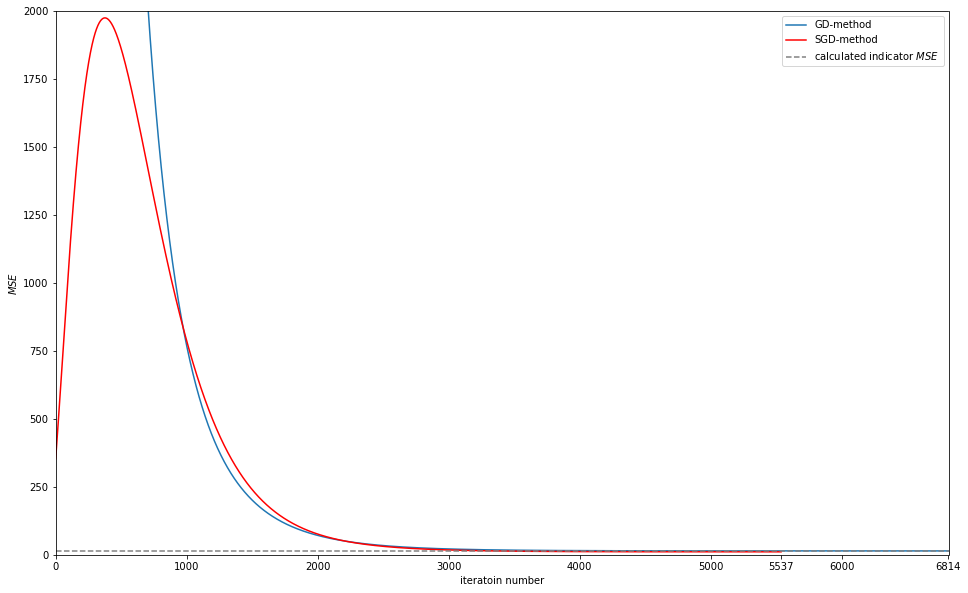

In [39]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_1)-1000))
plt.plot([x for x in range(len(score_1))], score_1, label='GD-method')
plt.plot([x for x in range(len(score_2))], score_2, c='r', label='SGD-method')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

In [33]:
len(score_1)

6814

На основании графиков можно сделать вывод что примерно до 800-й итерации $SGD$ 'расходился'(значение $MSE$ росло), затем, до уроня 2300-2400 итераций оба алгоритма сходились, при этом скорость схождения $GD$ была выше, чем у $SGD$. Однако затем скорости уравнялись, и $SGD$ сошелся раньше чем $GD$ (5538 итераций против 6746).  

---

**2.** Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [40]:
# L2 (Евклидова) норма вектора
def euclid(vec):
    norm=0
    for i in vec:
        norm+=i**2
    return norm**0.5

Подкорректируем функции $GD$ и $SGD$:

In [41]:
def my_grad_desc_reg(X, y, alpha=1e-04, verbose=False, tol=0.0, lambda_=0.0):
    '''
    added L2 regularization
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default 1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :param lambda_: regularization factor float default 0.0 
    :return: weights array, mse

    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)+lambda_*euclid(W) # добавляем в расчет ошибки фактор L2 регуляризации
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [46]:
W_3, mse_3, score_3 = my_grad_desc_reg(X, y, alpha=0.001, tol=0.00001, lambda_=0.001)

Stop descent! iteration: 6750, weights: [17.01881135 54.47005712  4.75419988 63.30967776 93.39776921 71.04158604
 86.98579437 10.23640173  3.51120187 70.81209444], mse: 14.484983481129813


In [47]:
def my_sgd_reg(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0, lambda_=0.0):
    '''
    added L2 regularization
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param batch_size: bath_size, int default=1
    :param n_epoh: number of training epochs, int default=1e+06
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :param lambda_: regularization factor float default 0.0
    :return: weights array, mse
    the function stops when the tol or n_epoch parameter is reached
    
    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)+lambda_*euclid(W) # добавляем в расчет ошибки фактор L2 регуляризации
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [48]:
W_4, mse_4, score_4 = my_sgd_reg(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001, lambda_=0.001)

Stop descent! n_epoch: 5520, weights: [17.03720126 54.52160637  4.6831437  63.30905725 93.32825437 71.13019244
 86.89045096 10.13041183  3.54016337 70.69129963], mse: 11.180673379032212


Сравним полученные результаты:

In [74]:
df=pd.DataFrame(
    {
        'methods':['GD', 'SGD','GD + L2','SGD + L2'],
        r'$\lambda$-coeff':[None,None,0.001,0.001],
        'tol-value': 0.00001,
        'iterations': [len(it) for it in [score_1, score_2, score_3,score_4]],
        'err-value': [it[-1] for it in [score_1, score_2, score_3,score_4]]
    }
)
df

,methods,$\lambda$-coeff,tol-value,iterations,err-value
0,GD,NaN,0.00001,6814,14.301229
1,SGD,NaN,0.00001,5537,10.999607
2,GD + L2,0.001,0.00001,6750,14.484973
3,SGD + L2,0.001,0.00001,5520,11.180663


На графике значения "слипаются"

In [70]:
# plt.figure(figsize=(16, 10))
# plt.ylim((0,np.max([np.max(score_2),np.max(score_4)])))
# plt.xlim((0,np.max([len(score_1), len(score_2), len(score_3), len(score_4)])-1000))
# plt.plot([x for x in range(1, len(score_1) + 1)], score_1, label='GD-method')
# plt.plot([x for x in range(1, len(score_2) + 1)], score_2, c='r', label='SGD-method')
# plt.plot([x for x in range(1, len(score_3) + 1)], score_3, label='GD-method with L2')
# plt.plot([x for x in range(1, len(score_4) + 1)], score_4, label='SGD-method with L2')
# plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
# plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2), len(score_3), len(score_4)])
# plt.xlabel('iteratoin number')
# plt.ylabel(r'$MSE$')
# plt.legend()
# plt.show()

**3 (опция).** Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [56]:
# L1 (Манхеттенская) норма вектора
def manhattan(vec):
    norm=0
    for i in vec:
        norm+=i if i>0 else -i
    return norm    

In [57]:
def grad_desc_reg(X, y, alpha=1e-04, verbose=False, tol=0.0, lambda_=0.0, regularization=None):
    '''
    added the choice of the regularization method L1 or L2
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default 1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :param lambda_: regularization factor float default 0.0
    :param regularization: regularization type str ('L1' or 'L2') default None    
    :return: weights array, mse

    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    if regularization=='L1': # учитываем тип регуляризации L1
        reg_elem=manhattan
    elif regularization=='L2': # учитываем тип регуляризации L2
        reg_elem=euclid
    else:
        reg_elem=lambda x: 0 # учитываем отсутствие регуляризации
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)+lambda_*reg_elem(W) # добавляем в расчет ошибки выбранный фактор регуляризации
        errors.append(err)
        if min_err - err > tol:  # контролируем текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [58]:
W_5, mse_5, score_5 = grad_desc_reg(X, y, alpha=0.001, tol=0.00001, lambda_=0.001, regularization='L1')

Stop descent! iteration: 6780, weights: [17.01863897 54.47026126  4.7540524  63.30977902 93.39771965 71.04170771
 86.9855581  10.23619397  3.51121266 70.81199881], mse: 14.776832249335945


In [60]:
def sgd_reg(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0, lambda_=0.0, regularization=None):
    '''
    added the choice of the regularization method L1 or L2
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param batch_size: bath_size, int default=1
    :param n_epoh: number of training epochs, int default=1e+06
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :param lambda_: regularization factor float default 0.0
    :param regularization: regularization type str ('L1' or 'L2') default None
    :return: weights array, mse
    the function stops when the tol or n_epoch parameter is reached
    
    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаём начальное значение весов
    n_batch = n // batch_size  # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаем количество итераций
    stop_chek = True  #будем чекать снижение ошибки
    errors = []  # добавлено для визуализации кривой обучения
    if regularization=='L1': # учитываем тип регуляризации
        reg_elem=manhattan
    elif regularization=='L2':
        reg_elem=euclid
    else:
        reg_elem=lambda x: 0
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)+lambda_*reg_elem(W)  # добавляем в расчет ошибки выбранный фактор регуляризации
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            min_err=err
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
            break
        if np.abs(min_err - err) > tol:          # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [63]:
W_6, mse_6, score_6 = sgd_reg(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001, lambda_=0.001, regularization='L1')

Stop descent! n_epoch: 5518, weights: [17.03642445 54.52074663  4.68495917 63.30930063 93.32995048 71.12804657
 86.89241627 10.13274945  3.53951557 70.6941867 ], mse: 11.473536870234723


Сравним результаты:

In [81]:
df=df.append(
    pd.DataFrame(
        {
            'methods':['GD + L1','SGD + L1'],
            r'$\lambda$-coeff':[0.001,0.001],
            'tol-value': 0.00001,
            'iterations': [len(it) for it in [score_5, score_6]],
            'err-value': [it[-1] for it in [score_5, score_6]]
        }
    ), ignore_index=True
)
df

,methods,$\lambda$-coeff,tol-value,iterations,err-value
0,GD,NaN,0.00001,6814,14.301229
1,SGD,NaN,0.00001,5537,10.999607
2,GD + L2,0.001,0.00001,6750,14.484973
3,SGD + L2,0.001,0.00001,5520,11.180663
4,GD + L1,0.001,0.00001,6780,14.776822
5,SGD + L1,0.001,0.00001,5518,11.473527


In [71]:
# plt.figure(figsize=(16, 10))
# plt.ylim((0,np.max([np.max(score_2),np.max(score_4), np.max(score_6)])))
# plt.xlim((0,np.max([len(score_1), len(score_2), len(score_3), len(score_4), len(score_5), len(score_6)])-1000))
# plt.plot([x for x in range(1, len(score_1) + 1)], score_1, label='GD-method')
# plt.plot([x for x in range(1, len(score_2) + 1)], score_2, c='r', label='SGD-method')
# plt.plot([x for x in range(1, len(score_3) + 1)], score_3, label='GD-method with L2')
# plt.plot([x for x in range(1, len(score_4) + 1)], score_4, label='SGD-method with L2')
# plt.plot([x for x in range(1, len(score_5) + 1)], score_5, label='GD-method with L1')
# plt.plot([x for x in range(1, len(score_6) + 1)], score_6, label='SGD-method with L1')
# plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
# plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2), len(score_3), len(score_4), len(score_5), len(score_6)])
# plt.xlabel('iteratoin number')
# plt.ylabel(r'$MSE$')
# plt.legend()
# plt.show()